<a href="https://colab.research.google.com/github/kungfumas/stbi/blob/master/klasteringrevisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install Sastrawi


In [7]:
!pip install beautifulsoup4

In [8]:
import requests
from bs4 import BeautifulSoup# Buat request ke website
r = requests.get('https://bola.kompas.com/')
soup = BeautifulSoup(r.content, 'html.parser')# Buat object untuk parse((mengurai) format HTML 
link = []
# Ambil semua tautan berita yang menarik
for i in soup.find('div', {'class':'most__wrap'}).find_all('a'): 
    
    i['href'] = i['href'] + '?page=all'
    link.append(i['href'])
    #dari tiap tautan ambil paragraph, kombinasikan tiap paragraph
    #simpan ke dalam larik documents
    
documents = []
for i in link:
    # Buat request ke tautan
    r = requests.get(i)
    # Initialize BeautifulSoup object untuk parse/mengurai isi 
    soup = BeautifulSoup(r.content, 'html.parser')
    # ambil semua paragraph dan masukkan ke dalam larik sen
    sen = []
    for i in soup.find('div', {'class':'read__content'}).find_all('p'):
        sen.append(i.text)
    # tabahkan semua paragraph yang sudah digabungkan ke dalam larik documents
    documents.append(' '.join(sen))

In [9]:
for d in documents:
    print(d)

KOMPAS.com - Pesaing timnas Indonesia di Grup B, yakni Malaysia dan Vietnam, sama-sama menuai start bagus di Piala AFF 2020.  Malaysia mengawali langkah mereka di pergelaran Piala AFF 2020 dengan hasil sempurna. Tim beralias Harimau Malaya menekuk Kamboja 3-1 pada laga perdana mereka di Grup B. Laga Grup B Piala AFF 2020 antara Kamboja vs Malaysia berlangsung di Stadion Bishan, Singapura, Senin (6/12/2021) sore WIB. Harimau Malaya menekuk Kamboja 3-1 berkat sumbangan gol Safawi Rasid (23’ pen.), Akhyar Rashid (61’), dan Kogileswaran Raj (78’). Kamboja yang dibesut pelatih asal Jepang, Ryu Hirose, dan didampingi oleh eks pilar AC Milan, Keisuke Honda, sebagai General Manager tim, hanya mampu sekali membalas. Baca juga: Hasil Piala AFF: Didampingi Keisuke Honda, Kamboja Ditekuk Malaysia 1-3 Gol Kamboja lahir pada menit-menit terakhir laga melalui sepakan penalti Sath Rosib (90'). Dapatkan informasi, inspirasi dan insight di email kamu.Daftarkan email Vietnam, yang tampil dengan membawa s

In [10]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in documents:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [11]:
documents_clean[0:5]

['kompas com saing timnas indonesia grup b malaysia vietnam sama tuai start bagus piala aff malaysia awal langkah gelar piala aff hasil sempurna tim alias harimau malaya tekuk kamboja laga perdana grup b laga grup b piala aff kamboja vs malaysia langsung stadion bishan singapura senin sore wib harimau malaya tekuk kamboja berkat sumbang gol safawi rasid pen akhyar rashid kogileswaran raj kamboja besut latih asal jepang ryu hirose damping eks pilar ac mil keisuke honda bagai general manager tim mampu sekali balas baca hasil piala aff damping keisuke honda kamboja tekuk malaysia gol kamboja lahir menit akhir laga lalu pakan penalti sath rosib informasi inspirasi insight email kamu daftar email vietnam tampil bawa status bagai juara tahan piala aff catat awal mantap laga perdana piala aff kontra laos stadion bishan senin malam wib skuad alias the golden star menang menang vietnam arah park hang seo gol nguyen cong phuong phan van duc vietnam pegang kendali mutlak atas laos kuat billy ketk

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

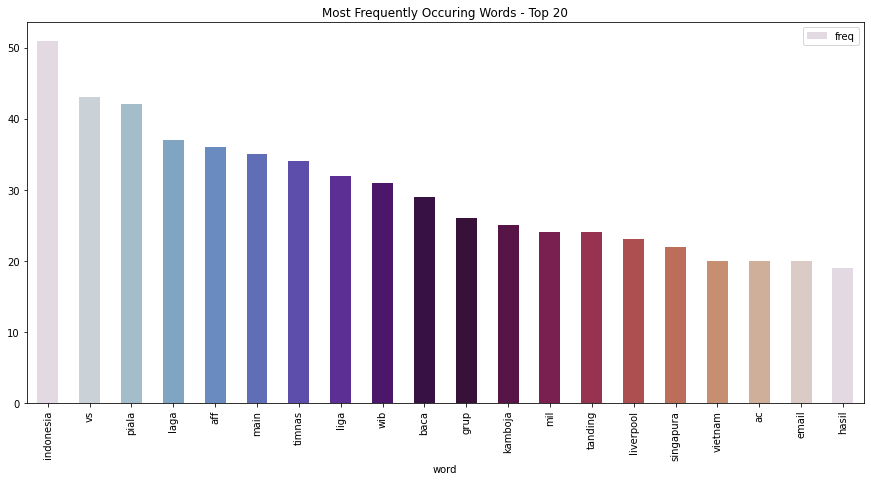

In [13]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [14]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [15]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 vs
 wib
 piala
 aff
 kamboja
 filipina
 singapura
 pukul
 myanmar
 timor
Cluster 1:
 indonesia
 timnas
 piala
 laga
 aff
 liga
 main
 baca
 grup
 barcelona
Cluster 2:
 liverpool
 mil
 ac
 vs
 main
 besar
 liga
 champions
 laga
 klopp




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
print("Prediction")
Y = cv.transform(["piala dunia"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["ronaldo"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [1]
Cluster number : [1]


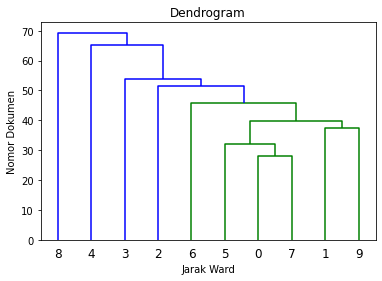

In [17]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

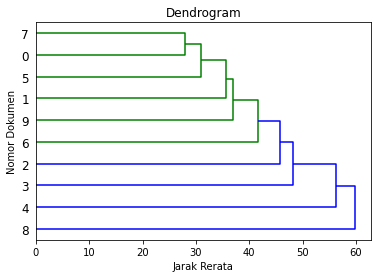

In [18]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[0 0 4 3 5 0 2 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


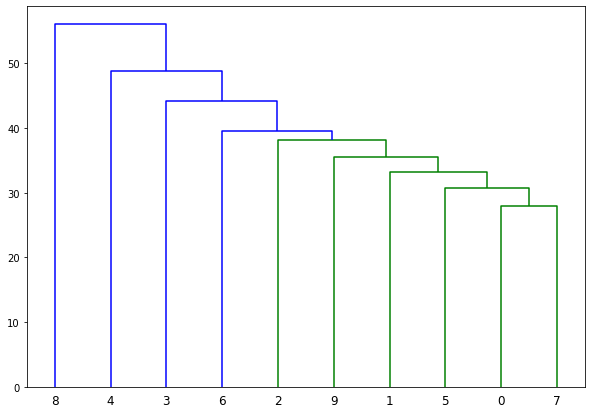

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, 10)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

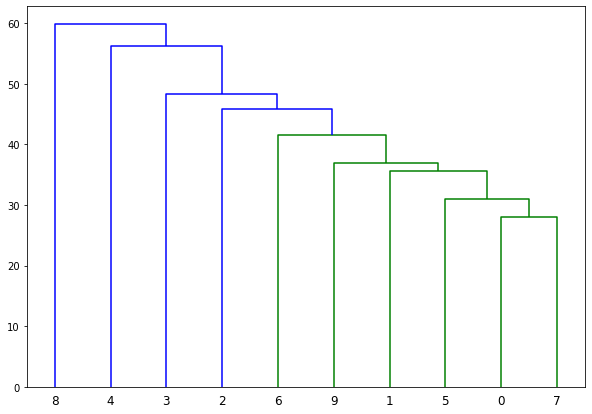

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, 10)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()